In [79]:
from scipy.io import wavfile
from matplotlib import pyplot as plt
import cv2
import numpy as np
img = cv2.imread('barbara.jpg')



In [80]:
img.shape

(512, 512, 3)

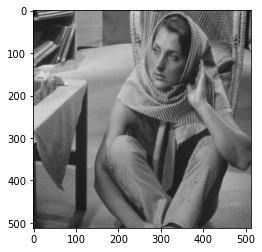

In [81]:
plt.imshow(img)

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


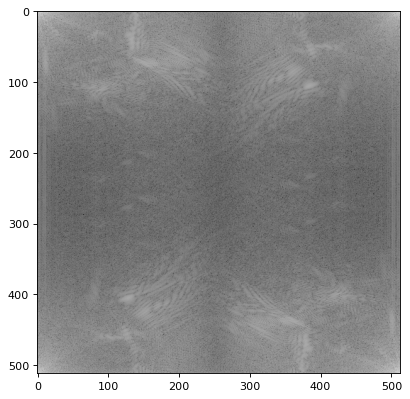

/home/mykola/anaconda3/envs/nets/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log


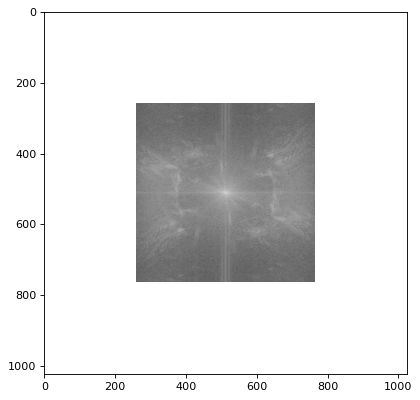

In [118]:
dark_image_grey_fourier = np.fft.fft2(gray)

plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray');
plt.show()

dark_image_grey_fourier = np.fft.fftshift(dark_image_grey_fourier)

# dark_image_grey_fourier = dark_image_grey_fourier[128:384, 128:384]

sample = np.zeros((1024, 1024), dtype=dark_image_grey_fourier.dtype)
sample[256:768, 256:768] = dark_image_grey_fourier
dark_image_grey_fourier = sample




plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray');

Text(0.5, 1.0, 'Reconstructed Image')

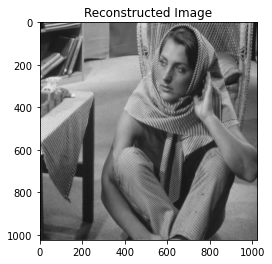

In [119]:
im_new = fftpack.ifft2(np.fft.ifftshift(dark_image_grey_fourier)).real

plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')

In [120]:
im_new.shape

(1024, 1024)

Text(0.5, 1.0, 'Fourier transform')

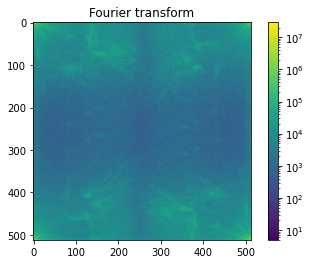

In [36]:
from scipy import fftpack
im_fft = fftpack.fft2(gray)

# Show the results

def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

plt.figure()
plot_spectrum(im_fft)
plt.title('Fourier transform')


Text(0.5, 1.0, 'Filtered Spectrum')

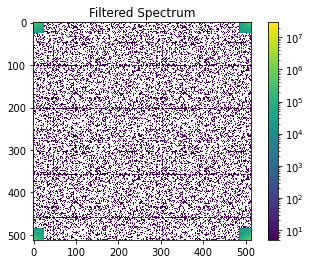

In [37]:
# In the lines following, we'll make a copy of the original spectrum and
# truncate coefficients.

# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 0.05

# Call ff a copy of the original transform. Numpy arrays have a copy
# method for this purpose.
im_fft2 = im_fft.copy()

# Set r and c to be the number of rows and columns of the array.
r, c = im_fft2.shape

# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

# Similarly with the columns:
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

plt.figure()
plot_spectrum(im_fft2)
plt.title('Filtered Spectrum')

In [38]:
im_fft2

array([[ 2.91672640e+07      -0.j        ,
        -7.62134157e+05-1438102.7968973j ,
         2.63066161e+05+1530620.01152951j, ...,
        -1.03724624e+05 +225592.10046859j,
         2.63066161e+05-1530620.01152951j,
        -7.62134157e+05+1438102.7968973j ],
       [-9.20884103e+05-2352747.12712124j,
        -2.18602622e+06+1125258.55433232j,
         9.88319379e+03 -510177.90778459j, ...,
        -4.00143140e+05 -456613.65583479j,
         3.92102532e+05 +228905.24402621j,
         7.94783653e+05  +15883.70285337j],
       [-3.32072446e+05+1085627.72813743j,
         2.57979527e+05+1231730.45128706j,
         5.01473993e+05 +208083.20031722j, ...,
         5.96479870e+04 -300641.65712684j,
        -9.69159735e+05 +552171.15072326j,
         1.87820090e+05 -179392.73996506j],
       ...,
       [-3.17749623e+05 -191861.17236273j,
        -5.99869787e+05 -600098.36990487j,
        -7.56861292e+04 +130418.65326241j, ...,
        -8.22478746e+05 -534794.83563098j,
        -2.69136481

Text(0.5, 1.0, 'Reconstructed Image')

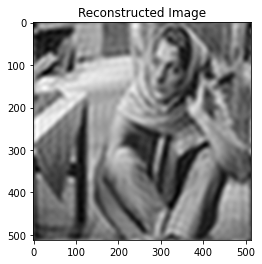

In [39]:
im_new = fftpack.ifft2(im_fft2).real

plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')

In [40]:
im_fft[256]

array([ 6.34400000e+03-0.00000000e+00j,  2.39331432e+03-4.19106032e+03j,
       -9.54969630e+02-1.98697919e+02j, -1.40857276e+03-3.64425431e+03j,
        2.81471649e+03+1.11582206e+03j, -1.21945360e+02-9.82117562e+02j,
       -1.80634174e+03-1.48167773e+02j, -2.49656776e+02-5.29903193e+02j,
       -7.82241565e+02-1.39677202e+03j,  1.15113344e+02-2.05281040e+03j,
       -2.23131192e+03-9.86902352e+01j, -2.13778442e+03-2.79254808e+03j,
       -1.46915048e+03+7.09835291e+02j, -3.54137126e+01-5.01022635e+02j,
       -8.16904583e+02+3.27200725e+02j,  1.16942173e+03-7.87001850e+02j,
       -7.81442186e+02+4.32438509e+02j,  9.11651153e+01-5.79962023e+02j,
       -8.26912959e+02-4.83124171e+02j, -7.14305794e+02+5.56236188e+02j,
        7.14813825e+02-8.49932698e+02j, -1.05385635e+03+2.16711532e+02j,
       -1.81429923e+02-6.81498017e+02j,  2.28504221e+02+6.92816926e+02j,
        2.27740793e+01-7.87247169e+02j,  9.14977407e+02+3.16723020e+02j,
        3.66376355e+02+2.17260357e+02j,  1.00748998

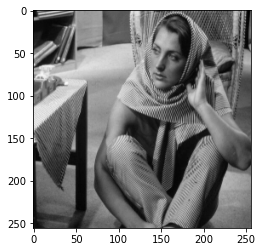

In [44]:
plt.imshow(cv2.resize(gray, (256, 256)), cmap='gray')
plt.show()
im_fft = fftpack.fft2(gray)
# im_fft = cv2.resize(im_fft.astype('float32'), (256, 256))
# im_new = fftpack.ifft2(im_fft).real
# plt.imshow(cv2.resize(im_new, (256, 256)), cmap='gray')
